**Mohammed Abuzar Younus - 8903244**


***LAB - 2***

#### Part A <br>
Use the Lab2 dataset provided. Load the dataset and split it into test and train. After that, train the model using Gaussian and Multinominal classifiers and post which model performs better. Use the trained model to perform some predictions on test data.

Importing all the library requirement

In [223]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Loading the dataset

In [224]:
# Load the dataset from CSV file
data_abu = pd.read_csv('Lab2_dataset.csv')
data_abu

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


Checking the top of the dataset

In [225]:
data_abu.head(20)


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
5,2949,ham,Subject: ehronline web address change\nthis me...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\nwe agr...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


Checking the bottom of the dataset 

In [226]:
data_abu.tail(20)

,Unnamed: 0,label,text,label_num
5151,3762,spam,Subject: fwd : transferring today ?\nrn $ 0 by...,1
5152,4778,spam,Subject: oxyyyyconttin no script needeeed\n{ t...,1
5153,2583,ham,Subject: feb 12 th sale to aquila\nfyi\ndaren ...,0
5154,2203,ham,Subject: re : hpl meter # 980074 bammel hpl d ...,0
5155,1904,ham,"Subject: cleburne - tenaska iv plant\ndaren ,\...",0
5156,1080,ham,"Subject: ami , , ,\nper our conversation , i w...",0
5157,256,ham,Subject: 5 th changes @ duke and air liquide\n...,0
5158,2789,ham,Subject: imbalance gas\njust in case worse com...,0
5159,4381,spam,Subject: pictures\nstreamlined denizen ajar ch...,1
5160,760,ham,Subject: mid year prc meeting\ni would like to...,0


In [227]:
# Count how many empty rows there are in each column.

empty_rows = data_abu.isnull().sum()
print(empty_rows)

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [228]:
# Returns the number of rows and columns as a tuple
shape = data_abu.shape  
print(shape)

(5171, 4)


In [229]:
columns = data_abu.columns  # Returns the column names
data_types = data_abu.dtypes  # Returns the data types of each column
summary_statistics = data_abu.describe()  # Returns summary statistics of numerical columns
print(columns)
print("\n")
print(data_types)
print("\n")
print(summary_statistics)

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object


        Unnamed: 0    label_num
count  5171.000000  5171.000000
mean   2585.000000     0.289886
std    1492.883452     0.453753
min       0.000000     0.000000
25%    1292.500000     0.000000
50%    2585.000000     0.000000
75%    3877.500000     1.000000
max    5170.000000     1.000000


x = data_abu.drop('target', axis=1): Creates the feature matrix X by dropping the 'target' column from the DataFrame data_abu using the drop function. The axis=1 parameter indicates that we are dropping a column.
y = data_abu['target']: Creates the target array y by assigning the 'target' column from the DataFrame df.

In [230]:
# Split the dataset into train and test sets
x_text = data_abu["text"]
y = data_abu["label_num"]


# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
x = vectorizer.fit_transform(x_text)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [231]:
# Train Gaussian Naive Bayes classifier
gaussian_model = GaussianNB()
gaussian_model.fit(x_train.toarray(), y_train)

GaussianNB()

In [232]:
print(x_test.toarray())
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]]
0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64


In [233]:
# Predict the labels for the test data
y_pred = gaussian_model.predict(x_test.toarray())

In [234]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9545893719806763


In [235]:
# Train Multinomial Naive Bayes classifier
multinomial_model = MultinomialNB()
multinomial_model.fit(x_train.toarray(), y_train)

MultinomialNB()

In [236]:
# Predict the labels for the test data
multinomial_model_yprediction = multinomial_model.predict(x_test)
print(multinomial_model_yprediction)

[0 1 0 ... 1 0 0]


In [237]:
# Calculate the accuracy of the classifier
mnbAccuracy = accuracy_score(y_test, multinomial_model_yprediction)
print("Accuracy:", mnbAccuracy)

Accuracy: 0.978743961352657


For the given data set, we utilised both gaussian and multinomial classifiers, and we evaluated the accuracy of both sets of data. Although the multinomial score is slightly higher, both accuracies are practically identical. <br>
Gaussian rating: 0.9545893719806763 <br>
multinomial rating: 0.978743961352657

### Part B <br>
Use this air bnb new york city dataset and remove outliers based on price per night for a given apartment/home. You can demonstrate why using other techniques like mean/median/ percentile works. The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities.

In [238]:
# Load the dataset from CSV file
data_air = pd.read_csv('AB_NYC_2019.csv')
data_air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [239]:
null_rows = data_air.isnull().sum()
duplicate_rows = data_air[data_air.duplicated()]

print(null_rows)
print(duplicate_rows)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


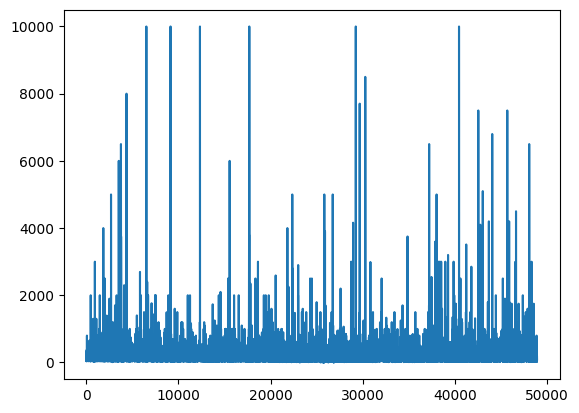

In [240]:
plt.plot(data_air['price']) 

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

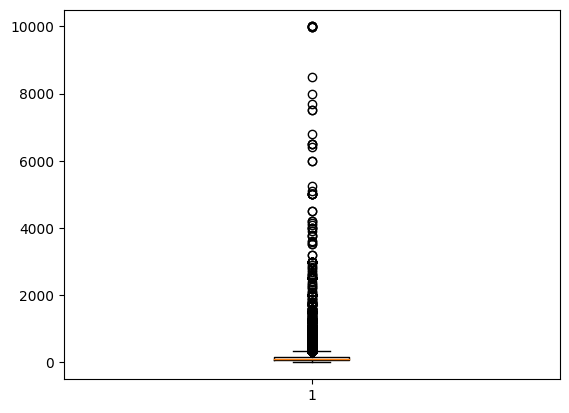

In [241]:
plt.boxplot(data_air["price"])
data_air["price"].describe()

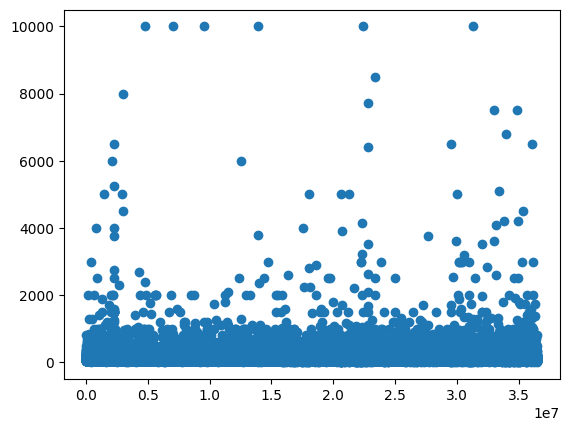

In [242]:
plt.scatter(x=data_air['id'], y=data_air['price'])

**The IQR approach is what I'm utilising to deal with outliers.**
**Fortunately, interquartile ranges are fairly resistant to the effects of outliers.**
**Additionally, this approach does not presuppose that the data are distributed normally or in any other way.**



In [243]:
# Calculate the IQR
q1 = np.percentile(data_air['price'], 25)
q3 = np.percentile(data_air['price'], 75)
iqr = q3 - q1
iqr

106.0

In [244]:

prices = data_air['price']

# Calculate the first quartile (Q1), third quartile (Q3), and IQR
q1 = np.percentile(prices, 25)
q3 = np.percentile(prices, 75)
iqr = q3 - q1

# Define the lower and upper boundaries
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(lower_bound)
print(upper_bound)

-90.0
334.0


In [245]:
# Identify the outliers present 
outliers = data_air[(data_air['price'] < lower_bound) | (data_air['price'] > upper_bound)]

# Printing the outliers
print("Outliers:")
print(outliers[['id', 'price']])

# Create a list of outlier IDs
outlier_ids = list(outliers['id'])

print("Outlier IDs:")
print(outlier_ids)


Outliers:
             id  price
61        15396    375
85        19601    800
103       23686    500
114       26933    350
121       27659    400
...         ...    ...
48758  36420289    350
48833  36450896    475
48839  36452721    800
48842  36453160    350
48856  36457700    345

[2972 rows x 2 columns]
Outlier IDs:
[15396, 19601, 23686, 26933, 27659, 38663, 45910, 60164, 61224, 63693, 68974, 70609, 79067, 80684, 80700, 89427, 103311, 125053, 141335, 141890, 148259, 162493, 165080, 166983, 173742, 174966, 177421, 177495, 188146, 236788, 239826, 241140, 248871, 250537, 250801, 253828, 254168, 255957, 256328, 261781, 265506, 268868, 273190, 276317, 279857, 285492, 289665, 323706, 329064, 339456, 342965, 363673, 369671, 394235, 414801, 437906, 443646, 468613, 471758, 478949, 479002, 484297, 493611, 494937, 509989, 512209, 512210, 512775, 513688, 523123, 531208, 546573, 550858, 576227, 598612, 625197, 634353, 640589, 644464, 644833, 651375, 654005, 664047, 672724, 690934, 692137, 702

In [246]:
# delete the outlier's
filtered_df = data_air[~data_air['id'].isin(outlier_ids)]
filtered_df_length = len(filtered_df)

print(filtered_df_length)

45923


In [247]:
price_mean = filtered_df['price'].mean()
price_median = filtered_df['price'].median()
price_min = filtered_df['price'].min()
price_max = filtered_df['price'].max()

print(price_mean)
print(price_median)
print(price_min)
print(price_max)

119.97031988328288
100.0
0
334


In [248]:
price_stats = filtered_df['price'].describe()

print(price_stats)

count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64
